#***predicting dimentia with NACC dataset using non-medical data***

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os
project_path = "/content/drive/MyDrive/Phase 1 - Resources"
print("Files will be saved here:", project_path)

Files will be saved here: /content/drive/MyDrive/Phase 1 - Resources


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

*#Dataset Download*

*This notebook uses the "Dementia Prediction Dataset".*
*If want to run the file, please change the "file" path accordingly where it directs to the csv file*


In [ ]:
file="/content/drive/MyDrive/Phase 1 - Resources/Dataset/Dementia Prediction Dataset.csv"
df=pd.read_csv(file)
df.head()

/tmp/ipython-input-3788476276.py:2: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,803,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file)


,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
0,NACC002909,186,I,3.0,12,28,2022,1,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
1,NACC002909,186,F,3.0,1,23,2024,2,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
2,NACC003487,186,I,3.0,11,15,2023,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
3,NACC004352,186,I,3.0,10,5,2021,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
4,NACC004687,186,I,3.0,11,14,2022,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4


In [ ]:
print(df.columns.tolist())


['NACCID', 'NACCADC', 'PACKET', 'FORMVER', 'VISITMO', 'VISITDAY', 'VISITYR', 'NACCVNUM', 'NACCAVST', 'NACCNVST', 'NACCDAYS', 'NACCFDYS', 'NACCCORE', 'NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'HISPORX', 'RACE', 'RACEX', 'RACESEC', 'RACESECX', 'RACETER', 'RACETERX', 'PRIMLANG', 'PRIMLANX', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'INBIRMO', 'INBIRYR', 'INSEX', 'NEWINF', 'INHISP', 'INHISPOR', 'INHISPOX', 'NACCNINR', 'INRACE', 'INRACEX', 'INRASEC', 'INRASECX', 'INRATER', 'INRATERX', 'INEDUC', 'INRELTO', 'INRELTOX', 'INKNOWN', 'INLIVWTH', 'INVISITS', 'INCALLS', 'INRELY', 'NACCFAM', 'NACCMOM', 'NACCDAD', 'NACCAM', 'NACCAMX', 'NACCAMS', 'NACCAMSX', 'NACCFM', 'NACCFMX', 'NACCFMS', 'NACCFMSX', 'NACCOM', 'NACCOMX', 'NACCOMS', 'NACCOMSX', 'NACCFADM', 'NACCFFTD', 'ANYMEDS', 'DRUG1', 'DRUG2', 'DRUG3', 'DRUG4', 'DRUG5', 'DRUG6', 'DRUG7', 'DRUG8', 'DRUG9', 'DRUG10', 'DRUG11', 'DRUG12', 'DRUG13', 'DRUG14', 'DRUG15', 'DRUG16', 'DRUG17', 'DRUG18'

In [ ]:
selected_features=['SEX','HISPANIC','HISPOR','RACE','RACESEC','RACETER','PRIMLANG','EDUC','MARISTAT','NACCLIVS','INDEPEND','RESIDENC','HANDED','NACCAGE','NACCAGEB','INBIRYR','NEWINF','INEDUC','INRELTO','INKNOWN','INLIVWTH','INRELY','NACCFAM','NACCMOM','NACCDAD','ANYMEDS','NACCAMD','TOBAC100','SMOKYRS','PACKSPER','QUITSMOK','ALCFREQ','CVHATT','HATTMULT','CVBYPASS','CVPACE','CVHVALVE','CBSTROKE','TBIBRIEF','TBIEXTEN','DEP2YRS','DEPOTHR','NACCTBI','HEIGHT','WEIGHT','NACCBMI','VISION','VISCORR','VISWCORR','HEARING','HEARAID','HEARWAID','HXSTROKE','HALL','HALLSEV','APP','APPSEV','BILLS','TAXES','SHOPPING','GAMES','STOVE','MEALPREP','EVENTS','PAYATTN','REMDATES','TRAVEL','CDRGLOB']
df=df[selected_features]
df.head()

,SEX,HISPANIC,HISPOR,RACE,RACESEC,RACETER,PRIMLANG,EDUC,MARISTAT,NACCLIVS,...,TAXES,SHOPPING,GAMES,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,CDRGLOB
0,1,0,88,1,88,88,1,16,1,4,...,0,1,0,1,0,1,0,1,1,0.5
1,1,0,88,1,88,88,1,16,1,2,...,1,0,0,0,0,1,1,2,0,0.5
2,1,0,88,1,88,88,1,16,1,2,...,0,0,0,0,0,0,0,0,0,0.0
3,2,1,1,1,88,88,2,16,1,2,...,3,3,3,3,3,3,3,3,3,1.0
4,1,1,1,1,88,88,1,12,3,1,...,0,0,0,0,0,0,0,0,0,0.0


*make dimentia column using CDRGLOB*

In [ ]:
df['Dementia_state'] = df['CDRGLOB'].apply(lambda x: 1 if x >= 0.5 else 0)
df.head()

,SEX,HISPANIC,HISPOR,RACE,RACESEC,RACETER,PRIMLANG,EDUC,MARISTAT,NACCLIVS,...,SHOPPING,GAMES,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,CDRGLOB,Dementia_state
0,1,0,88,1,88,88,1,16,1,4,...,1,0,1,0,1,0,1,1,0.5,1
1,1,0,88,1,88,88,1,16,1,2,...,0,0,0,0,1,1,2,0,0.5,1
2,1,0,88,1,88,88,1,16,1,2,...,0,0,0,0,0,0,0,0,0.0,0
3,2,1,1,1,88,88,2,16,1,2,...,3,3,3,3,3,3,3,3,1.0,1
4,1,1,1,1,88,88,1,12,3,1,...,0,0,0,0,0,0,0,0,0.0,0


***process data from non-numerical to numerical***

In [ ]:
df['HISPANIC']=df['HISPANIC'].replace({9:pd.NA }).astype('Int64')
df['HISPOR']=df['HISPOR'].replace({50:7,88:8,99:pd.NA,-4:pd.NA}).astype('Int64')
df['RACE']=df['RACE'].replace({50:6,99:pd.NA}).astype('Int64')
df['RACESEC']=df['RACESEC'].replace({50:6,88:pd.NA,99:pd.NA}).astype('Int64')
df['RACETER']=df['RACETER'].replace({50:6,88:pd.NA,99:pd.NA}).astype('Int64')
df['PRIMLANG']=df['PRIMLANG'].replace({9:pd.NA}).astype('Int64')
df['EDUC']=df['EDUC'].replace({99:pd.NA}).astype('Int64')
df['MARISTAT']=df['MARISTAT'].replace({9:pd.NA}).astype('Int64')
df['NACCLIVS']=df['NACCLIVS'].replace({9:pd.NA}).astype('Int64')
df['INDEPEND']=df['INDEPEND'].replace({9:pd.NA}).astype('Int64')
df['RESIDENC']=df['RESIDENC'].replace({9:pd.NA}).astype('Int64')
df['HANDED']=df['HANDED'].replace({9:pd.NA}).astype('Int64')

columns = ['HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED']

for col in columns:
    print(f"{col} value counts:")
    print(df[col].value_counts(dropna=False))  # dropna=False includes NaN counts
    print("-"*30)


HISPANIC value counts:
HISPANIC
0       180829
1        13690
<NA>       677
Name: count, dtype: Int64
------------------------------
HISPOR value counts:
HISPOR
8       181506
1         5203
2         2303
6         1881
3         1361
4         1127
5          889
7          527
<NA>       399
Name: count, dtype: Int64
------------------------------
RACE value counts:
RACE
1       159740
2        25870
5         4993
6         2351
3         1251
<NA>       832
4          159
Name: count, dtype: Int64
------------------------------
RACESEC value counts:
RACESEC
<NA>    189941
3         3039
1         1315
6          389
5          244
2          215
4           53
Name: count, dtype: Int64
------------------------------
RACETER value counts:
RACETER
<NA>    194085
1          491
3          412
2          104
5           53
6           43
4            8
Name: count, dtype: Int64
------------------------------
PRIMLANG value counts:
PRIMLANG
1       181937
2         8540
8         2756

In [ ]:
df['INBIRYR']=df['INBIRYR'].replace({9999:pd.NA,-4:pd.NA}).astype('Int64')
df['NEWINF']=df['NEWINF'].replace({9:pd.NA}).astype('Int64')
df['INEDUC']=df['INEDUC'].replace({99:pd.NA,-4:pd.NA}).astype('Int64')
df['INRELTO']=df['INRELTO'].replace({-4:pd.NA}).astype('Int64')
df['INKNOWN']=df['INKNOWN'].replace({999:pd.NA,-4:pd.NA}).astype('Int64')
df['INLIVWTH']=df['INLIVWTH'].replace({-4:pd.NA}).astype('Int64')
df['INRELY']=df['INRELY'].replace({-4:pd.NA}).astype('Int64')

In [ ]:
df['NACCFAM']=df['NACCFAM'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['NACCMOM']=df['NACCMOM'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['NACCDAD']=df['NACCDAD'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['ANYMEDS']=df['ANYMEDS'].replace({-4:pd.NA}).astype('Int64')
df['NACCAMD']=df['NACCAMD'].replace({-4:pd.NA}).astype('Int64')

In [ ]:
df['TOBAC100']=df['TOBAC100'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['SMOKYRS']=df['SMOKYRS'].replace({88:pd.NA,99:pd.NA,-4:pd.NA}).astype('Int64')
df['PACKSPER']=df['PACKSPER'].replace({88:pd.NA,99:pd.NA,-4:pd.NA}).astype('Int64')
df['QUITSMOK']=df['QUITSMOK'].replace({888:pd.NA,999:pd.NA,-4:pd.NA}).astype('Int64')
df['ALCFREQ']=df['ALCFREQ'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')

In [ ]:
df['CVHATT']=df['CVHATT'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['HATTMULT']=df['HATTMULT'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')
df['CVBYPASS']=df['CVBYPASS'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['CVPACE']=df['CVPACE'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['CVHVALVE']=df['CVHVALVE'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['CBSTROKE']=df['CBSTROKE'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')

In [ ]:
df['TBIBRIEF']=df['TBIBRIEF'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['TBIEXTEN']=df['TBIEXTEN'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['DEP2YRS']=df['DEP2YRS'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['DEPOTHR']=df['DEPOTHR'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['NACCTBI']=df['NACCTBI'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')

In [ ]:
df['HEIGHT']=df['HEIGHT'].replace({88.8:pd.NA,-4:pd.NA})
df['HEIGHT'] = df['HEIGHT'].astype('Float64')
df['HEIGHT'] = df['HEIGHT'] * (2.54/100)
df['HEIGHT'] = df['HEIGHT'].round(2)

df['WEIGHT']=df['WEIGHT'].replace({888:pd.NA,-4:pd.NA})
df['WEIGHT'] = df['WEIGHT'].astype('Float64')
df['WEIGHT'] = df['WEIGHT'] * 0.45359237
df['WEIGHT'] = df['WEIGHT'].round(2)

df['NACCBMI']=df['NACCBMI'].replace({888.8:pd.NA,-4:pd.NA})
df['NACCBMI'] = df['NACCBMI'].astype('Float64')
df['NACCBMI'] = df['NACCBMI']

print(df[['HEIGHT','WEIGHT','NACCBMI']].sample(10))

        HEIGHT  WEIGHT  NACCBMI
3734      <NA>    <NA>     <NA>
8650      <NA>    <NA>     <NA>
178100    1.73   78.47     26.1
115299    1.68   83.46     29.6
83261      1.7   72.57     25.1
9462      1.68   90.26     32.1
174764    1.61   91.63     35.2
108999    <NA>    <NA>     <NA>
98572     <NA>    <NA>     <NA>
107288    <NA>    <NA>     <NA>


In [ ]:
df['VISION']=df['VISION'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['VISCORR']=df['VISCORR'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['VISWCORR']=df['VISWCORR'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')

df['HEARING']=df['HEARING'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['HEARAID']=df['HEARAID'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['HEARWAID']=df['HEARWAID'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')

columns = ['VISION', 'VISCORR', 'VISWCORR', 'HEARING', 'HEARAID', 'HEARWAID']
for col in columns:
    print(f"{col} unique values:")
    print(df[col].unique())
    print("-"*30)


VISION unique values:
<IntegerArray>
[0, <NA>, 1]
Length: 3, dtype: Int64
------------------------------
VISCORR unique values:
<IntegerArray>
[1, <NA>, 0]
Length: 3, dtype: Int64
------------------------------
VISWCORR unique values:
<IntegerArray>
[1, <NA>, 0]
Length: 3, dtype: Int64
------------------------------
HEARING unique values:
<IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64
------------------------------
HEARAID unique values:
<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64
------------------------------
HEARWAID unique values:
<IntegerArray>
[<NA>, 1, 0]
Length: 3, dtype: Int64
------------------------------


In [ ]:
df['HXSTROKE']=df['HXSTROKE'].replace({-4:pd.NA}).astype('Int64')
df['HALL']=df['HALL'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['HALLSEV']=df['HALLSEV'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')
df['APP']=df['APP'].replace({9:pd.NA,-4:pd.NA}).astype('Int64')
df['APPSEV']=df['APPSEV'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')


In [ ]:
df['BILLS']=df['BILLS'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')
df['TAXES']=df['TAXES'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')
df['SHOPPING']=df['SHOPPING'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')
df['GAMES']=df['GAMES'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')
df['STOVE']=df['STOVE'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')
df['MEALPREP']=df['MEALPREP'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')
df['EVENTS']=df['EVENTS'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')
df['PAYATTN']=df['PAYATTN'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')
df['REMDATES']=df['REMDATES'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')
df['TRAVEL']=df['TRAVEL'].replace({8:pd.NA,9:pd.NA,-4:pd.NA}).astype('Int64')

In [ ]:
df = df.drop(['CDRGLOB'], axis=1)

import pandas as pd

with pd.option_context('display.max_columns', None):
    display(df.head())


,SEX,HISPANIC,HISPOR,RACE,RACESEC,RACETER,PRIMLANG,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,HANDED,NACCAGE,NACCAGEB,INBIRYR,NEWINF,INEDUC,INRELTO,INKNOWN,INLIVWTH,INRELY,NACCFAM,NACCMOM,NACCDAD,ANYMEDS,NACCAMD,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCFREQ,CVHATT,HATTMULT,CVBYPASS,CVPACE,CVHVALVE,CBSTROKE,TBIBRIEF,TBIEXTEN,DEP2YRS,DEPOTHR,NACCTBI,HEIGHT,WEIGHT,NACCBMI,VISION,VISCORR,VISWCORR,HEARING,HEARAID,HEARWAID,HXSTROKE,HALL,HALLSEV,APP,APPSEV,BILLS,TAXES,SHOPPING,GAMES,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,Dementia_state
0,1,0,8,1,<NA>,<NA>,1,16,1,4,1,1,2,70,70,1962,-4,16,1,8,1,0,1,0,0,1,13,0,0,0,<NA>,2,0,<NA>,0,<NA>,0,0,0,0,0,0,1,1.8,105.23,32.4,0,1,1,1,0,<NA>,<NA>,0,<NA>,0,<NA>,0,0,1,0,1,0,1,0,1,1,1
1,1,0,8,1,<NA>,<NA>,1,16,1,2,1,1,2,71,70,1962,0,<NA>,1,<NA>,1,0,1,0,0,1,12,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1.8,99.79,30.7,0,1,1,1,0,<NA>,<NA>,0,<NA>,0,<NA>,1,1,0,0,0,0,1,1,2,0,1
2,1,0,8,1,<NA>,<NA>,1,16,1,2,1,1,2,66,66,1958,-4,16,1,40,1,0,0,0,0,1,4,0,0,0,<NA>,4,0,<NA>,0,<NA>,0,0,0,0,0,0,0,1.83,79.38,23.7,<NA>,<NA>,<NA>,1,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0
3,2,1,1,1,<NA>,<NA>,2,16,1,2,2,1,2,63,63,<NA>,-4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,3,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,0,<NA>,1,0,<NA>,<NA>,1,1,1,2,3,3,3,3,3,3,3,3,3,3,1
4,1,1,1,1,<NA>,<NA>,1,12,3,1,1,1,2,77,77,1950,-4,12,3,<NA>,0,0,<NA>,0,0,1,1,0,0,0,<NA>,0,0,<NA>,0,<NA>,0,0,0,0,0,0,0,1.65,51.71,19.0,0,1,1,0,0,<NA>,<NA>,0,<NA>,0,<NA>,0,0,0,0,0,0,0,0,0,0,0


***Data visualization***

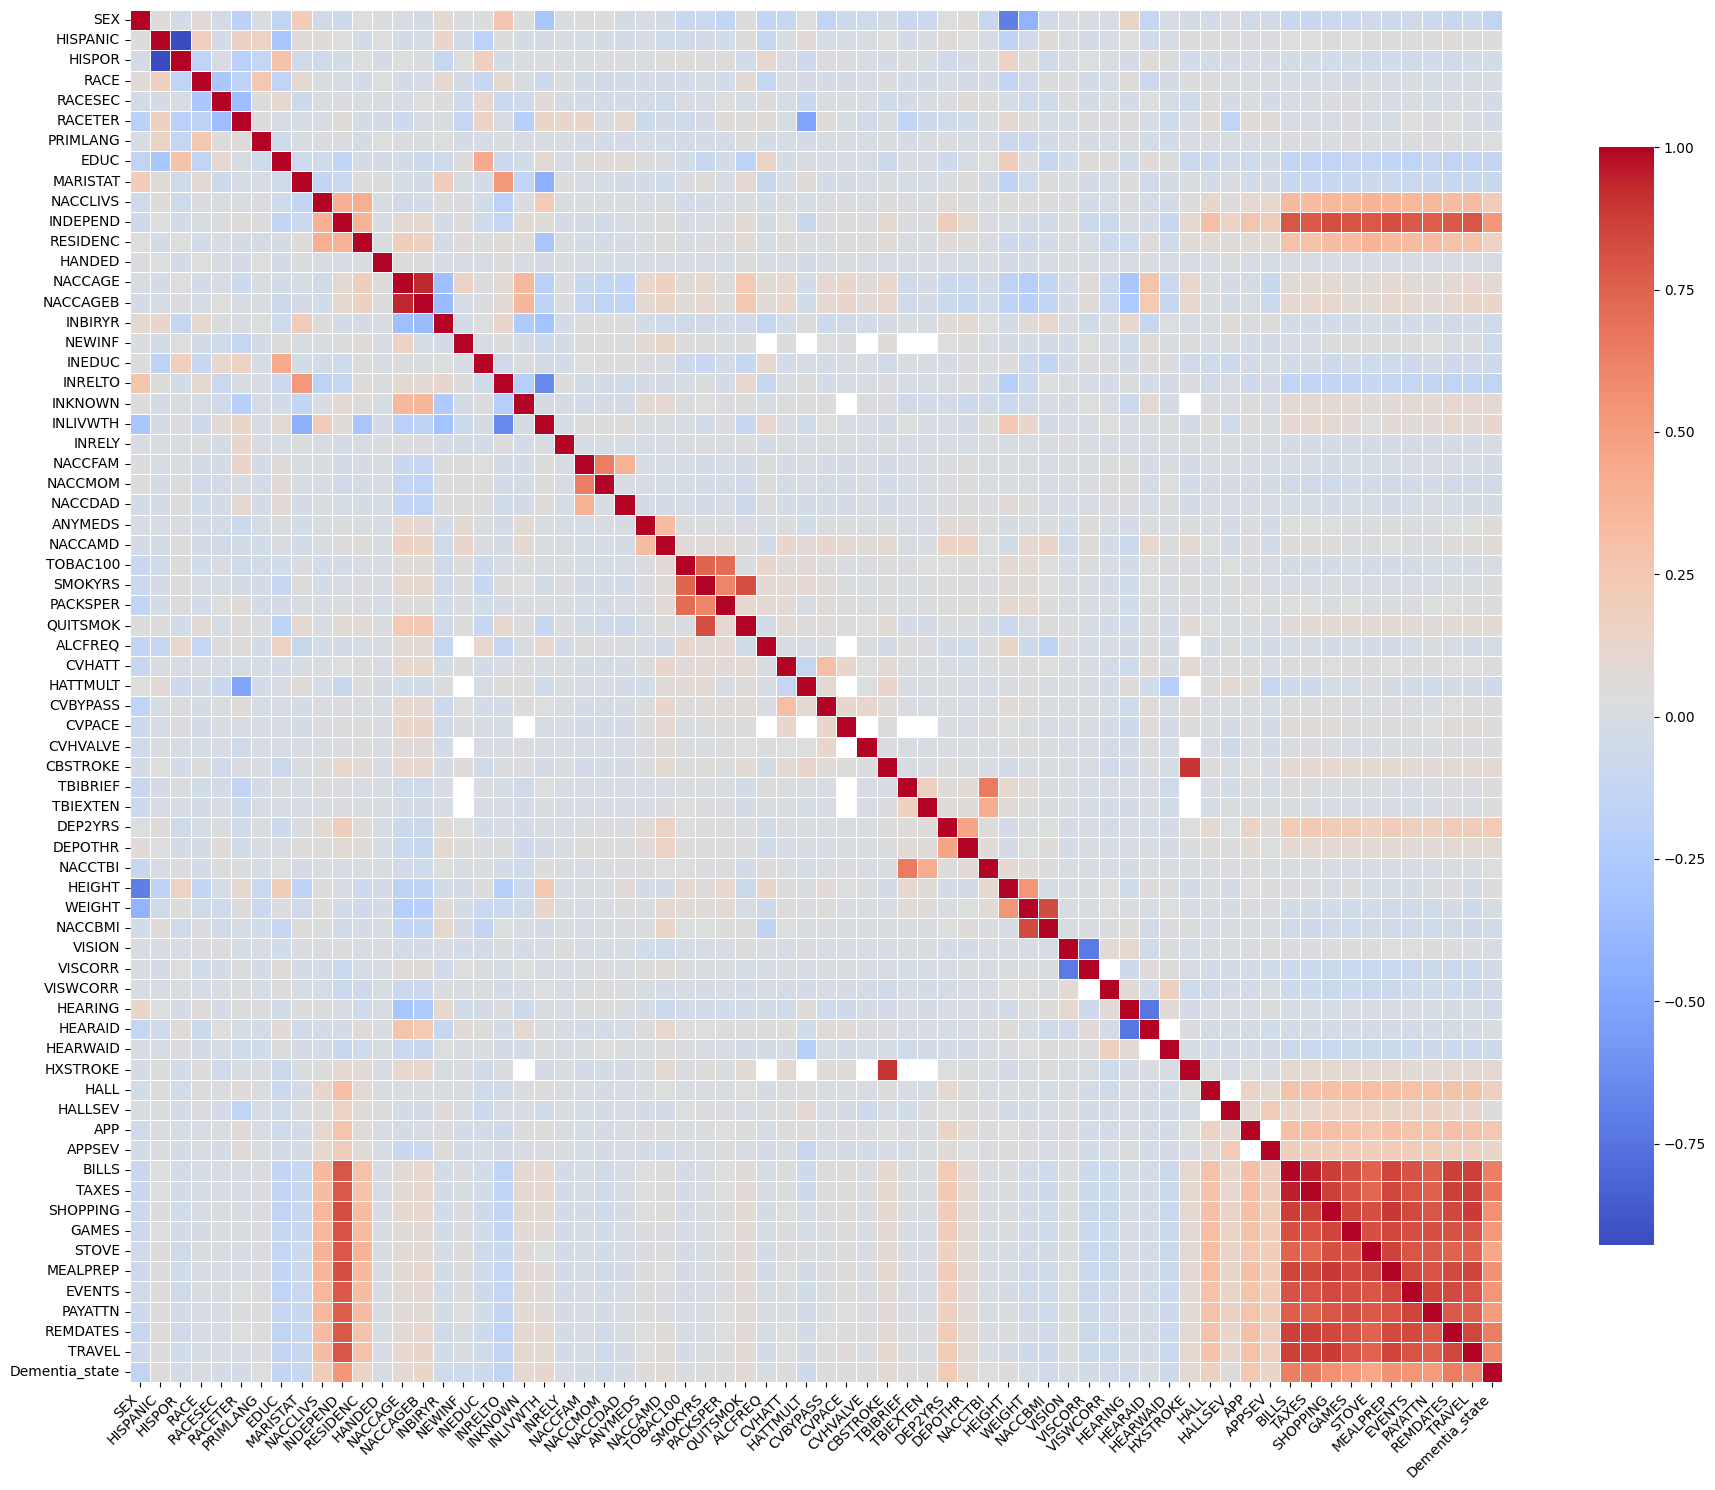

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr,
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()



In [ ]:

corr = df.corr()

pd.set_option('display.max_rows', None)
corr_with_dementia = corr['Dementia_state'].sort_values(ascending=False)
# Display full list
print(corr_with_dementia)


Dementia_state    1.000000
TAXES             0.658512
REMDATES          0.640488
BILLS             0.634812
TRAVEL            0.602342
SHOPPING          0.561485
MEALPREP          0.548428
EVENTS            0.534401
INDEPEND          0.532715
GAMES             0.525308
PAYATTN           0.507861
STOVE             0.443636
APP               0.260054
DEP2YRS           0.238478
NACCLIVS          0.217929
HALL              0.186336
RESIDENC          0.160108
NACCAGEB          0.140721
APPSEV            0.140599
INLIVWTH          0.124362
INKNOWN           0.097152
HXSTROKE          0.095600
CBSTROKE          0.091508
NACCAGE           0.089306
DEPOTHR           0.088602
NACCAMD           0.074452
QUITSMOK          0.069674
ANYMEDS           0.051372
TBIBRIEF          0.050876
HEIGHT            0.050085
HALLSEV           0.049745
CVPACE            0.049463
HISPANIC          0.044824
CVHATT            0.042262
TBIEXTEN          0.040037
PACKSPER          0.039070
CVBYPASS          0.038811
N

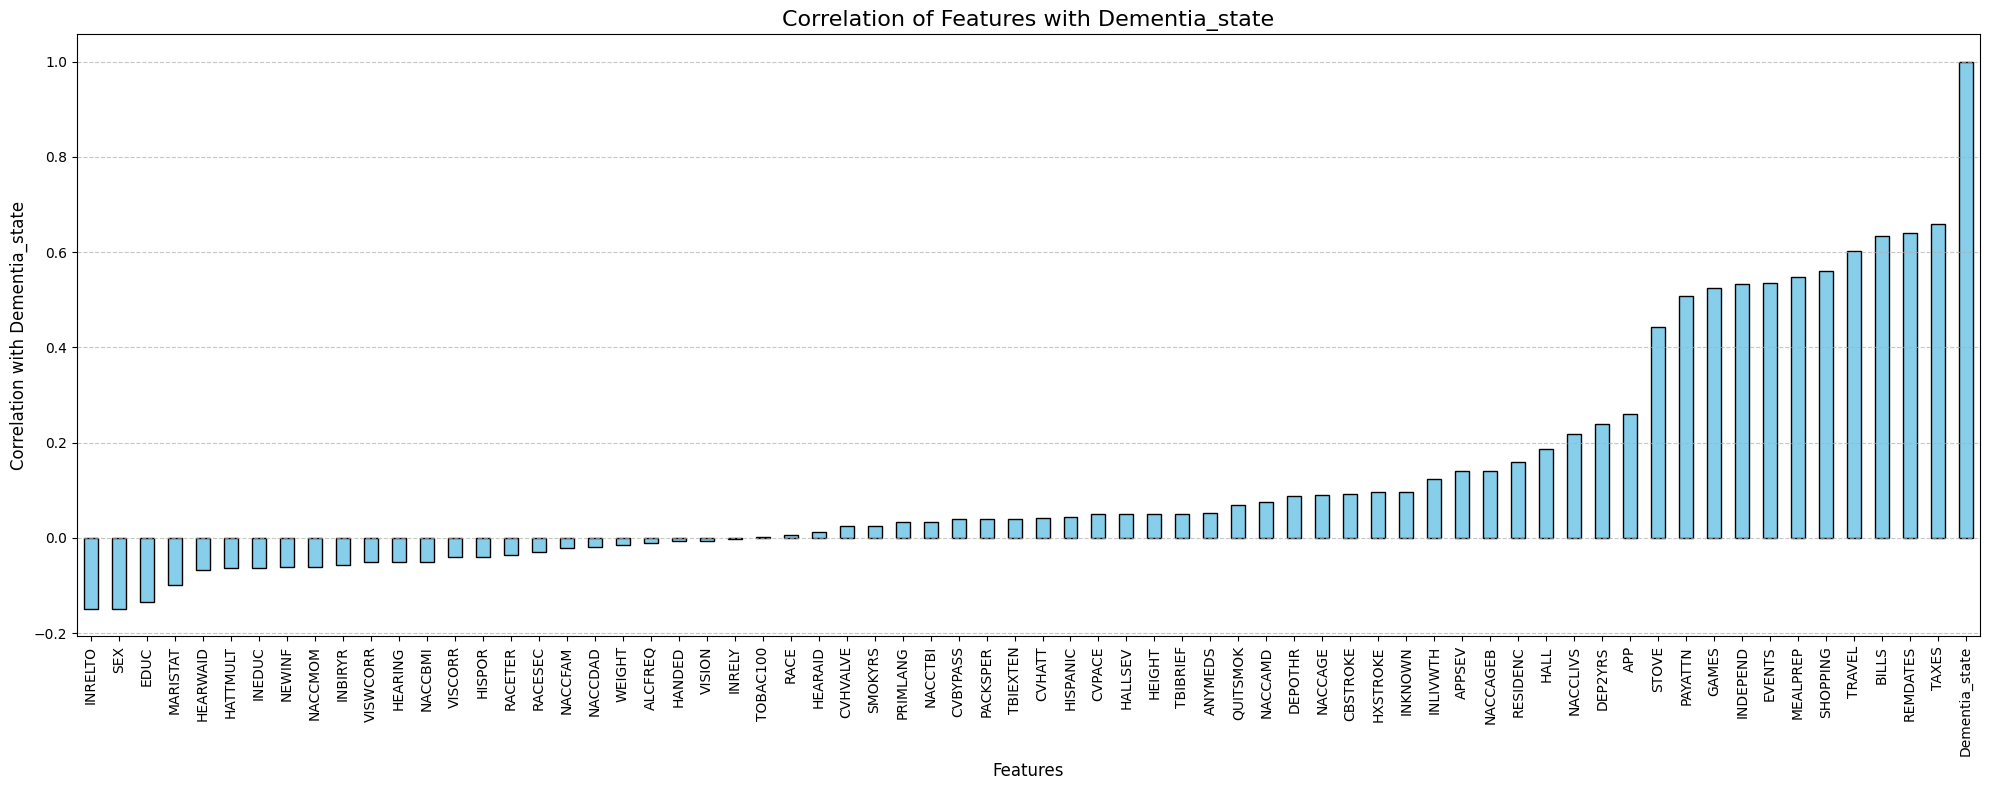

In [ ]:
import matplotlib.pyplot as plt

corr_with_target = df.corr()['Dementia_state'].sort_values()

# Plot vertical bar chart
plt.figure(figsize=(20, 8))
corr_with_target.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)
plt.ylabel('Correlation with Dementia_state', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.title('Correlation of Features with Dementia_state', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



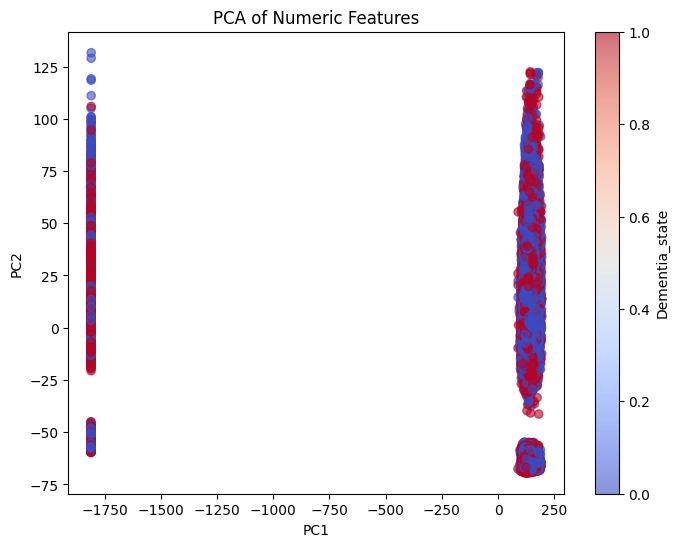

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numeric_features = df.select_dtypes(include=['int64', 'Int64', 'float64', 'Float64']).columns.tolist()
numeric_features.remove('Dementia_state')

# Fill NaN with 0 or any imputation
X = df[numeric_features].fillna(0)

# Apply PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=df['Dementia_state'], cmap='coolwarm', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Numeric Features')
plt.colorbar(label='Dementia_state')
plt.show()


*rows and their null value count*

In [ ]:
row_count = len(df)
print(f"row_count: {row_count}")
print("\n")
for col in df.columns:
    print(f"{col} - {df[col].isnull().sum()} ")

row_count: 195196


SEX - 0 
HISPANIC - 677 
HISPOR - 399 
RACE - 832 
RACESEC - 189941 
RACETER - 194085 
PRIMLANG - 276 
EDUC - 974 
MARISTAT - 896 
NACCLIVS - 324 
INDEPEND - 597 
RESIDENC - 2878 
HANDED - 1032 
NACCAGE - 0 
NACCAGEB - 0 
INBIRYR - 13835 
NEWINF - 0 
INEDUC - 138035 
INRELTO - 8288 
INKNOWN - 172480 
INLIVWTH - 8288 
INRELY - 8288 
NACCFAM - 17766 
NACCMOM - 6192 
NACCDAD - 8259 
ANYMEDS - 2739 
NACCAMD - 2739 
TOBAC100 - 72924 
SMOKYRS - 75562 
PACKSPER - 71664 
QUITSMOK - 146660 
ALCFREQ - 182955 
CVHATT - 72060 
HATTMULT - 194557 
CVBYPASS - 71863 
CVPACE - 91373 
CVHVALVE - 175673 
CBSTROKE - 72131 
TBIBRIEF - 176088 
TBIEXTEN - 176112 
DEP2YRS - 72802 
DEPOTHR - 73391 
NACCTBI - 72904 
HEIGHT - 37841 
WEIGHT - 35994 
NACCBMI - 39645 
VISION - 28864 
VISCORR - 28150 
VISWCORR - 65330 
HEARING - 28725 
HEARAID - 28061 
HEARWAID - 167092 
HXSTROKE - 99092 
HALL - 12187 
HALLSEV - 187757 
APP - 12092 
APPSEV - 167751 
BILLS - 21642 
TAXES - 26312 
SHOPPING - 11822 

*remove rows with high null value count*

In [ ]:
df=df.drop(['RACESEC','RACETER','INKNOWN','INEDUC','QUITSMOK','ALCFREQ','HATTMULT','HEARWAID','HALLSEV','APPSEV'],axis=1)
#remove as they have too much null values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.6 MB/s eta 0:00:00


In [ ]:
X = df.drop(['Dementia_state'], axis=1)
y = df['Dementia_state']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4,shuffle=True)

from sklearn.impute import SimpleImputer

# Use median for numeric features
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

#scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


*tune the parameters of each model*

*train models to see which gives the best accuracy*

In [ ]:
#define hyperparameter grids for each model
param_grids = {
    'Decision Tree': {'max_depth': [3, 5, 7, 12, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 12, None]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

#instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'CatBoost': CatBoostClassifier(verbose=0)
}

#Train and evaluate each model
for name, model in models.items():
    # Scale data for specific models
    if name in ['K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression']:
        X_train_used = X_train_scaled
        X_test_used = X_test_scaled
      #use non-scaled data
    else:
        X_train_used = X_train
        X_test_used = X_test

    print(f"Training {name}...")

    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train_used, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_used)

    print(f'\n{ name } Classification Report:')
    print(classification_report(y_test, y_pred))
    print(f'Best Parameters: {grid_search.best_params_}\n{"-"*70}\n')


Training Decision Tree...

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     18777
           1       0.92      0.80      0.85     20263

    accuracy                           0.86     39040
   macro avg       0.86      0.86      0.86     39040
weighted avg       0.87      0.86      0.86     39040

Best Parameters: {'max_depth': 7}
----------------------------------------------------------------------

Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     18777
           1       0.92      0.83      0.87     20263

    accuracy                           0.87     39040
   macro avg       0.88      0.88      0.87     39040
weighted avg       0.88      0.87      0.87     39040

Best Parameters: {'max_depth': None, 'n_estimators': 100}
------------------------------------------------------

*create a voting class classifier using best accuracy giving models*

*use only tree-based classifiers*

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score

#tune the data and train
best_rf = RandomForestClassifier(max_depth=None, n_estimators=200)

best_xgb = XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

best_cat = CatBoostClassifier(
    iterations=200,
    learning_rate=0.01,
    verbose=0
)


best_rf.fit(X_train, y_train)
best_xgb.fit(X_train, y_train)
best_cat.fit(X_train, y_train)

#create voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('cat', best_cat)
    ],
    voting='soft'
)

# Train the ensemble
voting_clf.fit(X_train, y_train)

# Predict
y_pred = voting_clf.predict(X_test)

# Evaluate
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Ensemble Accuracy: 0.8670081967213115

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87     18777
           1       0.92      0.81      0.86     20263

    accuracy                           0.87     39040
   macro avg       0.87      0.87      0.87     39040
weighted avg       0.87      0.87      0.87     39040



*calibrate and save the result files
compressed and calibrated trained model file and scaler file*

In [ ]:
import joblib
from sklearn.calibration import CalibratedClassifierCV

# Save the scaler
joblib.dump(scaler, "/content/scaler.pkl")
print("Scaler saved successfully!")

# Calibrate the voting classifier
calibrated_model = CalibratedClassifierCV(
    voting_clf,
    cv='prefit',
    method='sigmoid'
)

# Fit calibration on the test set
calibrated_model.fit(X_test, y_test)

# Save the calibrated model
joblib.dump(calibrated_model, "/content/ensemble_calibrated.pkl",compress=3)
print("Calibrated ensemble model saved successfully!")


Scaler saved successfully!
Calibrated ensemble model saved successfully!


In [ ]:
from google.colab import files

files.download("/content/scaler.pkl")
files.download("/content/ensemble_calibrated.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*feature importance graph using the trained models*

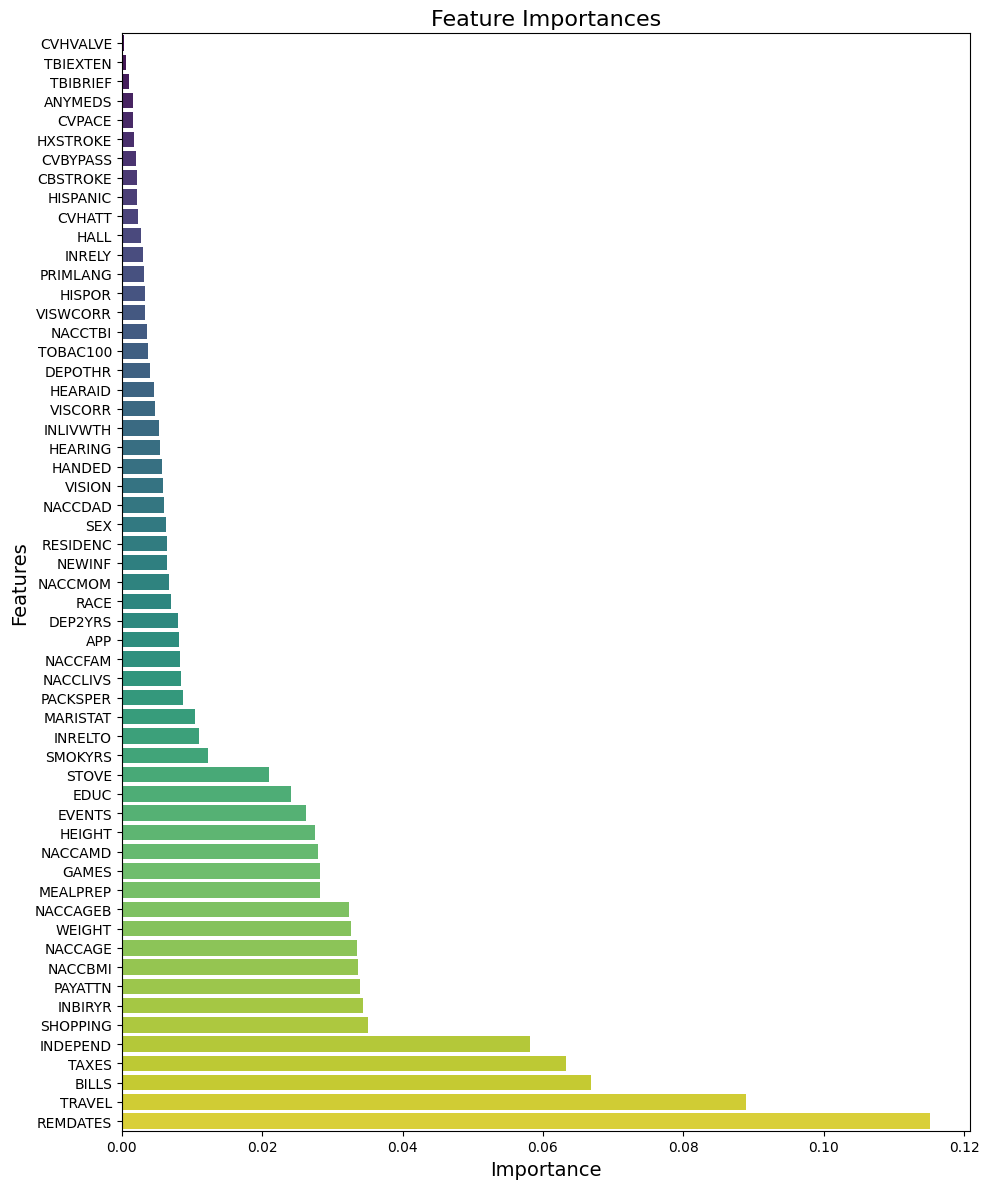

In [ ]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=True)  # ascending for horizontal barplot

# Plot
plt.figure(figsize=(10,12))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
with pd.option_context('display.max_columns', None):
    display(df.head())

,SEX,HISPANIC,HISPOR,RACE,PRIMLANG,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,HANDED,NACCAGE,NACCAGEB,INBIRYR,NEWINF,INRELTO,INLIVWTH,INRELY,NACCFAM,NACCMOM,NACCDAD,ANYMEDS,NACCAMD,TOBAC100,SMOKYRS,PACKSPER,CVHATT,CVBYPASS,CVPACE,CVHVALVE,CBSTROKE,TBIBRIEF,TBIEXTEN,DEP2YRS,DEPOTHR,NACCTBI,HEIGHT,WEIGHT,NACCBMI,VISION,VISCORR,VISWCORR,HEARING,HEARAID,HXSTROKE,HALL,APP,BILLS,TAXES,SHOPPING,GAMES,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,Dementia_state
0,1,0,8,1,1,16,1,4,1,1,2,70,70,1962,-4,1,1,0,1,0,0,1,13,0,0,0,0,0,<NA>,0,0,0,0,0,0,1,1.8,105.23,32.4,0,1,1,1,0,<NA>,0,0,0,0,1,0,1,0,1,0,1,1,1
1,1,0,8,1,1,16,1,2,1,1,2,71,70,1962,0,1,1,0,1,0,0,1,12,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1.8,99.79,30.7,0,1,1,1,0,<NA>,0,0,1,1,0,0,0,0,1,1,2,0,1
2,1,0,8,1,1,16,1,2,1,1,2,66,66,1958,-4,1,1,0,0,0,0,1,4,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,1.83,79.38,23.7,<NA>,<NA>,<NA>,1,0,<NA>,<NA>,<NA>,0,0,0,0,0,0,0,0,0,0,0
3,2,1,1,1,2,16,1,2,2,1,2,63,63,<NA>,-4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,3,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,0,<NA>,1,0,<NA>,1,1,3,3,3,3,3,3,3,3,3,3,1
4,1,1,1,1,1,12,3,1,1,1,2,77,77,1950,-4,3,0,0,<NA>,0,0,1,1,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,1.65,51.71,19.0,0,1,1,0,0,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0


`using some examples results to get predictions`

In [ ]:
input_df1 = {
    "SEX": 1, "HISPANIC": 0, "HISPOR": 8, "RACE": 1, "PRIMLANG": 1, "EDUC": 16, "MARISTAT": 1,
    "NACCLIVS": 4, "INDEPEND": 1, "RESIDENC": 1, "HANDED": 2, "NACCAGE": 70, "NACCAGEB": 70,
    "INBIRYR": 1962, "NEWINF": -4, "INRELTO": 1, "INLIVWTH": 1, "INRELY": 0, "NACCFAM": 1,
    "NACCMOM": 0, "NACCDAD": 0, "ANYMEDS": 1, "NACCAMD": 13, "TOBAC100": 0, "SMOKYRS": 0,
    "PACKSPER": 0, "CVHATT": 0, "CVBYPASS": 0, "CVPACE": 0, "CVHVALVE": 0, "CBSTROKE": 0,
    "TBIBRIEF": 0, "TBIEXTEN": 0, "DEP2YRS": 0, "DEPOTHR": 0, "NACCTBI": 0, "HEIGHT": 1.8,
    "WEIGHT": 105.23, "NACCBMI": np.nan, "VISION": 0, "VISCORR": 1, "VISWCORR": np.nan,
    "HEARING": 1, "HEARAID": np.nan, "HXSTROKE": np.nan, "HALL": 0, "APP": 0, "BILLS": 0,
    "TAXES": 1, "SHOPPING": 0, "GAMES": 1, "STOVE": 0, "MEALPREP": 1, "EVENTS": 0, "PAYATTN": 1,
    "REMDATES": 1, "TRAVEL": 1
}

# Convert dictionary to DataFrame (shape: 1 row)
input_df1 = pd.DataFrame([input_df1])

#using the voting classifier
prediction = voting_clf.predict(input_df1)
prediction_prob = voting_clf.predict_proba(input_df1)

prediction_label = {0: "Non-Dementia", 1: "Risk of Dementia"}

print("Predicted Dementia State:", prediction_label[prediction[0]])
print("Prediction Probabilities:", prediction_prob[0])



Predicted Dementia State: Risk of Dementia
Prediction Probabilities: [0.04447749 0.95552251]


In [ ]:
input_df2 = {
    "SEX": 0, "HISPANIC": 1, "HISPOR": 7, "RACE": 2, "PRIMLANG": 1, "EDUC": 12, "MARISTAT": 2,
    "NACCLIVS": 3, "INDEPEND": 0, "RESIDENC": 1, "HANDED": 1, "NACCAGE": 75, "NACCAGEB": 75,
    "INBIRYR": 1945, "NEWINF": -4, "INRELTO": 3, "INLIVWTH": np.nan, "INRELY": 1, "NACCFAM": 0,
    "NACCMOM": 0, "NACCDAD": 0, "ANYMEDS": 1, "NACCAMD": 5, "TOBAC100": 1, "SMOKYRS": 25,
    "PACKSPER": 1, "CVHATT": 1, "CVBYPASS": 0, "CVPACE": np.nan, "CVHVALVE": 0, "CBSTROKE": 0,
    "TBIBRIEF": 0, "TBIEXTEN": 0, "DEP2YRS": 0, "DEPOTHR": 0, "NACCTBI": 0, "HEIGHT": 1.65,
    "WEIGHT": 68, "NACCBMI": 25.0, "VISION": 1, "VISCORR": 0, "VISWCORR": 1, "HEARING": 1,
    "HEARAID": 0, "HXSTROKE": np.nan, "HALL": 0, "APP": 1, "BILLS": 0, "TAXES": 0, "SHOPPING": 1,
    "GAMES": 0, "STOVE": 0, "MEALPREP": 1, "EVENTS": 0, "PAYATTN": 1, "REMDATES": 0, "TRAVEL": 1
}

# Convert to DataFrame
input_df2 = pd.DataFrame([input_df2])

#the voting classifier
prediction2 = voting_clf.predict(input_df2)
prediction_prob2 = voting_clf.predict_proba(input_df2)

prediction_label = {0: "Non-Dementia", 1: "Risk of Dementia"}

print("Predicted Dementia State:", prediction_label[prediction[0]])
print("Prediction Probabilities:", prediction_prob[0])


Predicted Dementia State: Risk of Dementia
Prediction Probabilities: [0.04447749 0.95552251]


In [ ]:
low_risk_sample = X_train[y_train == 0].iloc[0]  # first sample with Dementia_state = 0
input_df_low_risk = pd.DataFrame([low_risk_sample])

# Predict
prediction_low_risk = voting_clf.predict(input_df_low_risk)
prediction_prob_low_risk = voting_clf.predict_proba(input_df_low_risk)

prediction_label = {0: "Non-Dementia", 1: "Risk of Dementia"}

print("Predicted Dementia State:", prediction_label[prediction[0]])
print("Prediction Probabilities:", prediction_prob[0])


Predicted Dementia State: Risk of Dementia
Prediction Probabilities: [0.04447749 0.95552251]


In [ ]:
input_df3 = {
    "SEX": 0, "HISPANIC": 0, "HISPOR": 1, "RACE": 1, "PRIMLANG": 1, "EDUC": 16, "MARISTAT": 1,
    "NACCLIVS": 0, "INDEPEND": 1, "RESIDENC": 0, "HANDED": 1, "NACCAGE": 65, "NACCAGEB": 65,
    "INBIRYR": 1958, "NEWINF": 0, "INRELTO": 0, "INLIVWTH": 1, "INRELY": 0, "NACCFAM": 1,
    "NACCMOM": 0, "NACCDAD": 0, "ANYMEDS": 0, "NACCAMD": 0, "TOBAC100": 0, "SMOKYRS": 0,
    "PACKSPER": 0, "CVHATT": 0, "CVBYPASS": 0, "CVPACE": 0, "CVHVALVE": 0, "CBSTROKE": 0,
    "TBIBRIEF": 0, "TBIEXTEN": 0, "DEP2YRS": 0, "DEPOTHR": 0, "NACCTBI": 0, "HEIGHT": 1.70,
    "WEIGHT": 70, "NACCBMI": 24, "VISION": 1, "VISCORR": 1, "VISWCORR": 1, "HEARING": 1,
    "HEARAID": 0, "HXSTROKE": 0, "HALL": 0, "APP": 0, "BILLS": 0, "TAXES": 0, "SHOPPING": 0,
    "GAMES": 0, "STOVE": 0, "MEALPREP": 0, "EVENTS": 0, "PAYATTN": 0, "REMDATES": 0, "TRAVEL": 0
}

input_df3 = pd.DataFrame([input_df3])

prediction = voting_clf.predict(input_df3)
prediction_prob = voting_clf.predict_proba(input_df3)[0]

# Map
prediction_label = {0: "Non-Dementia", 1: "Risk of Dementia"}

# Estimated risk as percentage
risk_percentage = prediction_prob[1] * 100  # probability of dementia

print("Predicted Dementia State:", prediction_label[prediction[0]])

print(f"Probability of Non-Dementia: {prediction_prob[0]*100:.2f}%")
print(f"Probability of Risk of Dementia: {prediction_prob[1]*100:.2f}%")

Predicted Dementia State: Non-Dementia
Probability of Non-Dementia: 87.29%
Probability of Risk of Dementia: 12.71%


*Final evaluation*

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict for the test set
y_pred = voting_clf.predict(X_test)
y_pred_prob = voting_clf.predict_proba(X_test)

# Map numeric predictions to labels
prediction_label = {0: "Non-Dementia", 1: "Risk of Dementia"}
y_pred_labels = [prediction_label[p] for p in y_pred]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

#classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87     18777
           1       0.92      0.81      0.86     20263

    accuracy                           0.87     39040
   macro avg       0.87      0.87      0.87     39040
weighted avg       0.87      0.87      0.87     39040

